## 第 9 回　暗号資産、実データ
---
---

#### **課題**
**暗号資産**

1. 暗号資産の 1 分足データの取得方法について調べて下さい。

解答例：省略

---
2. 2023年10月16日から2023年10月30日までの、BTC, ETH, XRP, USDT の1分足データを取得して、pandas の DataFrame を作って下さい。

解答例：

In [1]:
# 暗号資産の 1 分足データ
# Import Libraries
import requests
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

# The CoinDesk 20
#coindesk20_list = ['BTC', 'ETH', 'XRP', 'ADA', 'USDT', 'DOGE', 'XLM', 'DOT', 'UNI', 'LINK', 'USDC', 'BCH', 'LTC', 'GRT', 'ETC', 'FIL', 'AAVE', 'ALGO', 'EOS']
coindesk20_list = ['BTC', 'ETH', 'XRP', 'USDT']

raw_df = pd.DataFrame()

for coin in coindesk20_list:
    coin_df = pd.DataFrame()
    df = pd.DataFrame(index=[0])

    # Define the Start Date and End Date
    end_datetime = datetime(2023, 10, 31, 0, 0)
    datetime_checkpt = datetime(2023, 10, 16, 0, 0)

    while len(df) > 0:
        if end_datetime == datetime_checkpt:
            break
        start_datetime = end_datetime - relativedelta(hours = 12)
        url = 'https://production.api.coindesk.com/v2/price/values/' + coin + '?start_date=' + start_datetime.strftime("%Y-%m-%dT%H:%M") + '&end_date=' + end_datetime.strftime("%Y-%m-%dT%H:%M") + '&ohlc=true'
        temp_data_json = requests.get(url)
        temp_data = temp_data_json.json()
        df = pd.DataFrame(temp_data['data']['entries'])
        df.columns = ['Timestamp', 'Open', 'High', 'Low', 'Close']
        
        # Handle the Missing Data
        insert_idx_list = [np.nan]
        while len(insert_idx_list) > 0:
            timestamp_checking_array = np.array(df['Timestamp'][1:]) - np.array(df['Timestamp'][:-1])
            insert_idx_list = np.where(timestamp_checking_array != 60000)[0]
            if len(insert_idx_list) > 0:
                #print('There are ' + str(len(insert_idx_list)) + ' timestamp mismatched.')
                insert_idx = insert_idx_list[0]
                temp_df = df.iloc[insert_idx.repeat(int(timestamp_checking_array[insert_idx]/60000)-1)].reset_index(drop=True)
                temp_df['Timestamp'] = [temp_df['Timestamp'][0] + i*60000 for i in range(1, len(temp_df)+1)]
                df = pd.concat([df.loc[:insert_idx], temp_df, df.loc[insert_idx+1:]]).reset_index(drop=True)
                insert_idx_list = insert_idx_list[1:]
        
        df = df.drop(['Timestamp'], axis=1)
        df['Datetime'] = [end_datetime - relativedelta(minutes=len(df)-i) for i in range(0, len(df))]
        coin_df = pd.concat([df, coin_df])
        end_datetime = start_datetime
    coin_df['Symbol'] = coin
    raw_df = pd.concat([raw_df,coin_df])
raw_df = raw_df[['Datetime', 'Symbol', 'Open', 'High', 'Low', 'Close']].reset_index(drop=True)
raw_df.to_csv('data/raw_df_Oct_2023.csv', index=False)

3. 問題 2. が出来ない場合は、data/raw_df_Oct_2023.csv を使って、pandas の DataFrame を作って下さい。BTC, ETH, XRP, USDT それぞれの 1 分足の対数リターン（Open to Close）を計算して　DataFrame に追加して下さい。

解答例：

<img src="figs/01.jpg" width="650px">

4. BTC, ETH, XRP, USDT それぞれの 1 分足の終値をグラフで可視化して下さい。また、対数リターンを一つのグラフで可視化して下さい。

解答例：

<img src="figs/02.jpg" width="650px">

<img src="figs/03.jpg" width="650px">

<img src="figs/04.jpg" width="650px">

<img src="figs/05.jpg" width="650px">

<img src="figs/06.jpg" width="650px">

5. 対数リターンを標準化した後に、BTC, ETH, XRP, USDT それぞれの間の相関係数を計算して下さい。また、それぞれの相関の散布図も描いてください。

解答例：

<img src="figs/07.jpg" width="400px">

散布図の可視化は省略

**財務データ**
1. 証券取引所に上場している企業の財務データを取得する方法について調べて下さい。

解答例：

2. data/firm_US.tsv は、NYSE、NASDAQ、AMEX に上場している企業の財務データである。pandas の DataFrame を作って下さい。

解答例：

[Financial Modeling Prep](https://site.financialmodelingprep.com) よりダウンロード。API_key が必要。

<img src="figs/08.jpg" width="650px">

4. BTC, ETH, XRP, USDT それぞれの 1 分足の終値をグラフで可視化して下さい。また、対数リターンを一つのグラフで可視化して下さい。

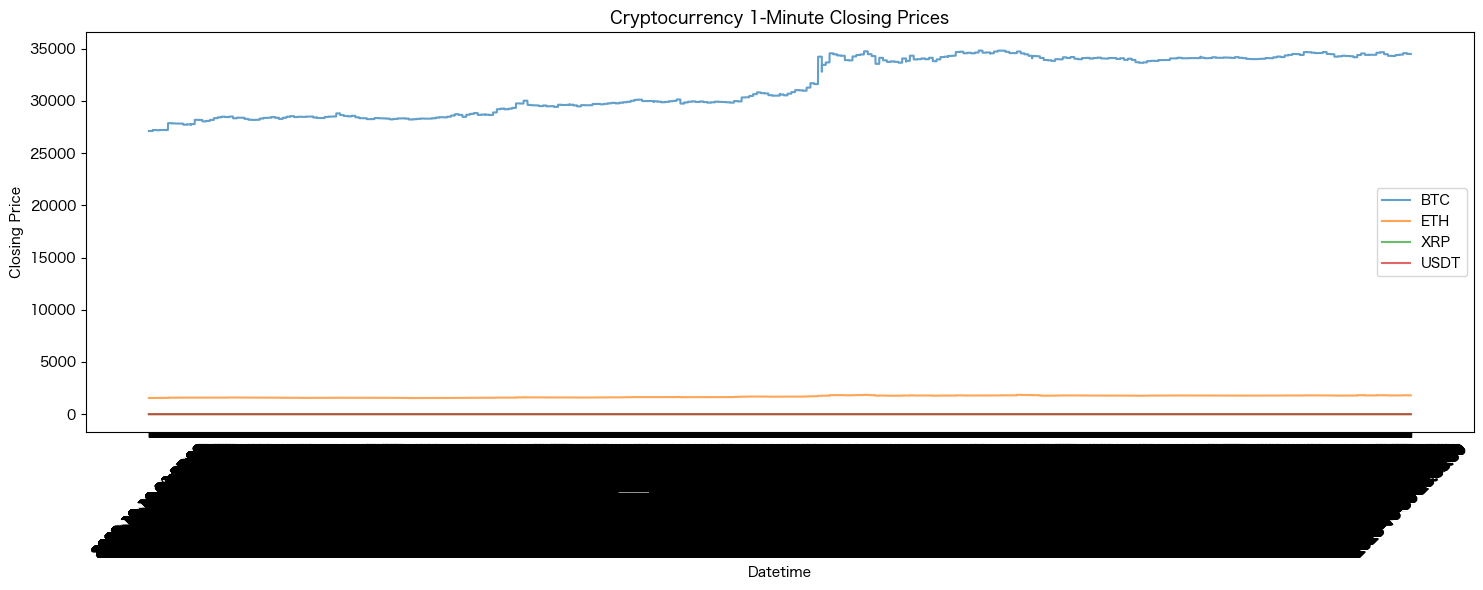

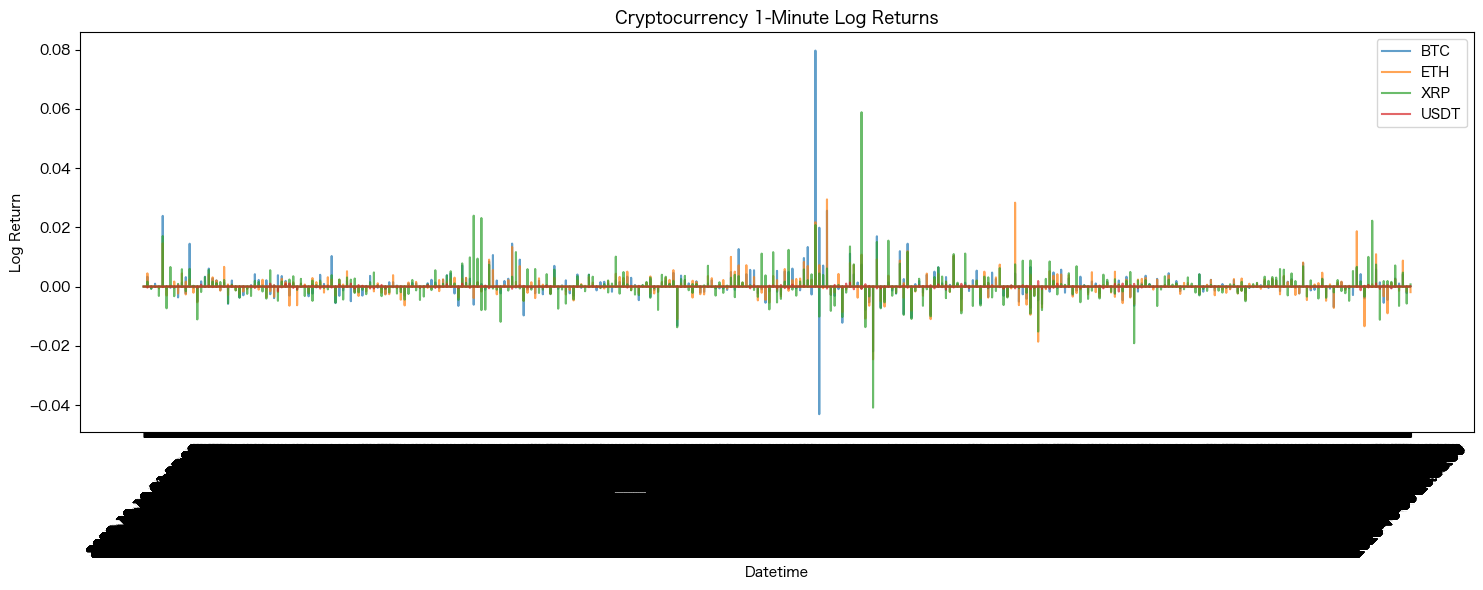

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# CSVファイルからデータを読み込む
file_path = '/Users/shishishikakou/Downloads/データサイエンス特論/09/data/raw_df_Oct_2023.csv'
df = pd.read_csv(file_path)

# 暗号資産別に終値のデータを取得
btc_data = df[df['Symbol'] == 'BTC']['Close']
eth_data = df[df['Symbol'] == 'ETH']['Close']
xrp_data = df[df['Symbol'] == 'XRP']['Close']
usdt_data = df[df['Symbol'] == 'USDT']['Close']
timestamps = df[df['Symbol'] == 'BTC']['Datetime']  # 全ての暗号資産で同じタイムスタンプを使用

# 各暗号資産の終値をプロット
plt.figure(figsize=(15, 6))
plt.plot(timestamps, btc_data, label='BTC', alpha=0.7)
plt.plot(timestamps, eth_data, label='ETH', alpha=0.7)
plt.plot(timestamps, xrp_data, label='XRP', alpha=0.7)
plt.plot(timestamps, usdt_data, label='USDT', alpha=0.7)
plt.legend()
plt.title('Cryptocurrency 1-Minute Closing Prices')
plt.xlabel('Datetime')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 対数リターンを計算
btc_log_return = np.log(btc_data / btc_data.shift(1))
eth_log_return = np.log(eth_data / eth_data.shift(1))
xrp_log_return = np.log(xrp_data / xrp_data.shift(1))
usdt_log_return = np.log(usdt_data / usdt_data.shift(1))

# 対数リターンをプロット
plt.figure(figsize=(15, 6))
plt.plot(timestamps, btc_log_return, label='BTC', alpha=0.7)
plt.plot(timestamps, eth_log_return, label='ETH', alpha=0.7)
plt.plot(timestamps, xrp_log_return, label='XRP', alpha=0.7)
plt.plot(timestamps, usdt_log_return, label='USDT', alpha=0.7)
plt.legend()
plt.title('Cryptocurrency 1-Minute Log Returns')
plt.xlabel('Datetime')
plt.ylabel('Log Return')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. 対数リターンを標準化した後に、BTC, ETH, XRP, USDT それぞれの間の相関係数を計算して下さい。また、それぞれの相関の散布図も描いてください。

3. 1985年、1990年、1995年、2000年、2005年、2010年、2015年、2020年の revenue のランクサイズ分布を、一つのグラフで可視化して下さい。

解答例：

<img src="figs/09.jpg" width="450px">

<img src="figs/10.jpg" width="450px">

4. revenue の相補累積分布（complementary cumulative distribution, CCD）を可視化して下さい。

解答例：

<img src="figs/11.jpg" width="450px">

5. 2018 年の revenue の相補累積分布 の高額領域が、べき分布に従うことを説明してください。

解答例：

<img src="figs/12.jpg" width="450px">